# Inhibitory gating of ensembles

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import nengo
from nengo.processes import Piecewise

## Step 1: Create the network

Our model consists of two ensembles (called A and B)
that receive inputs from a common sine wave signal generator.

Ensemble A is gated using the output of a node,
while Ensemble B is gated using the output of a third ensemble (C).
This is to demonstrate that ensembles can be gated
using either node outputs, or decoded outputs from ensembles.

In [2]:
n_neurons = 30

model = nengo.Network(label="Inhibitory Gating")
with model:
    A = nengo.Ensemble(n_neurons, dimensions=1)
    B = nengo.Ensemble(n_neurons, dimensions=1)
    C = nengo.Ensemble(n_neurons, dimensions=1)

## Step 2: Provide input to the model

As described in Step 1, this model requires two inputs.

1. A sine wave signal that is used to drive ensembles A and B
2. An inhibitory control signal used to (directly) gate ensemble A,
   and (indirectly through ensemble C) gate ensemble B.

In [3]:
with model:
    sin = nengo.Node(np.sin)
    inhib = nengo.Node(Piecewise({0: 0, 2.5: 1, 5: 0, 7.5: 1, 10: 0, 12.5: 1}))

## Step 3: Connect the different components of the model

In this model, we need to make the following connections:

1. From sine wave generator to Ensemble A
2. From sine wave generator to Ensemble B
3. From inhibitory control signal to the neurons of Ensemble A
   (to directly drive the currents of the neurons)
4. From inhibitory control signal to Ensemble C
5. From Ensemble C to the neurons of Ensemble B
   (this demonstrates that the decoded output of Ensemble C
   can be used to gate Ensemble B)

In [4]:
with model:
    nengo.Connection(sin, A)
    nengo.Connection(sin, B)
    nengo.Connection(inhib, A.neurons, transform=[[-2.5]] * n_neurons)
    nengo.Connection(inhib, C)
    nengo.Connection(C, B.neurons, transform=[[-2.5]] * n_neurons)

## Step 4: Probe outputs

Anything that is probed will collect the data it produces over time,
allowing us to analyze and visualize it later.
Let's collect all the data produced.

In [5]:
with model:
    sin_probe = nengo.Probe(sin)
    inhib_probe = nengo.Probe(inhib)
    A_probe = nengo.Probe(A, synapse=0.01)
    B_probe = nengo.Probe(B, synapse=0.01)
    C_probe = nengo.Probe(C, synapse=0.01)

## Step 5: Run the model

In order to run the model, we have to create a simulator.
Then, we can run that simulator over and over again
without affecting the original model.

In [6]:
with nengo.Simulator(model) as sim:
    sim.run(15)

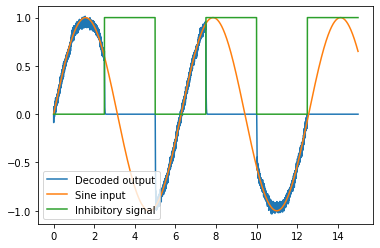

In [7]:
# Plot the decoded output of Ensemble A
plt.figure()
plt.plot(sim.trange(), sim.data[A_probe], label='Decoded output')
plt.plot(sim.trange(), sim.data[sin_probe], label='Sine input')
plt.plot(sim.trange(), sim.data[inhib_probe], label='Inhibitory signal')
plt.legend();

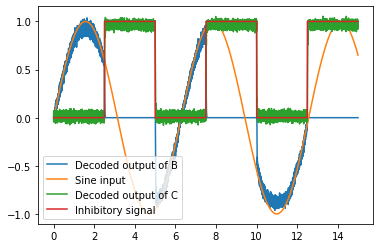

In [8]:
# Plot the decoded output of Ensemble B and C
plt.figure()
plt.plot(sim.trange(), sim.data[B_probe], label='Decoded output of B')
plt.plot(sim.trange(), sim.data[sin_probe], label='Sine input')
plt.plot(sim.trange(), sim.data[C_probe], label='Decoded output of C')
plt.plot(sim.trange(), sim.data[inhib_probe], label='Inhibitory signal')
plt.legend();